In [6]:
import os
from sys import path
dir_actual = os.getcwd()
path.insert(0, 'C:/Users/guill/OneDrive/Documentos/Tesis/Proyect')

import myfuncions.randomize_f as myrand
import myfuncions.core_shell_f as cs
import myfuncions.tools_f as tools
import subprocess as sbp
import myfuncions.graphs_f as gf

coords = cs.cubeShell(14,2.775,'fcc')
atpos, eleList = cs.atpos_eleList_maker(coords,'Pt')
atpos, eleList = tools.spherical_cut(atpos, eleList, 25)
atpos, eleList, mode = myrand.cambiar_elementos_prob(atpos,{'Pt':0.28, 'Pd':0.45, 'Co':0.27})
tools.show_percent(atpos, eleList)
#atpos = myrand.remove_at_powrad(atpos,0.20,25,1)

name = 'probe.xyz'
tools.wXYZ(atpos, name)
sbp.run(['java', '-jar', 'C:\\Users\\guill\\Downloads\\Jmol-16.1.41-binary\\jmol-16.1.41\\Jmol.jar', name])

#gf.dump_graficar_atpr(atpos,'Pt',1.4)

Corta esfericamente al atpos
Cambia elementos prob a atpos
atomos totales : 4321
Co : 27.47049294144874 %, 1187
Pd : 43.90187456607267 %, 1897
Pt : 28.627632492478593 %, 1237


CompletedProcess(args=['java', '-jar', 'C:\\Users\\guill\\Downloads\\Jmol-16.1.41-binary\\jmol-16.1.41\\Jmol.jar', 'probe.xyz'], returncode=0)

In [7]:
from myfuncions.lammpin_f import wlammpin

wlammpin(atpos,eleList,name)

probe.ini


In [8]:
input = f"""
# 2NN EAM potential in LAMMPS

 units		metal
 atom_style	atomic
 boundary	f f f

 read_data	{name[:-4]}.ini
 pair_style	meam
 pair_coeff	* * ..\\..\\LAMMPS\\library-PtPdCo.meam Pt Pd Co ..\\..\\LAMMPS\\PtPdCo.pot Pt Pd Co
  
 neighbor	0.5 bin
 neigh_modify	every 1 delay 0 check yes once no
 velocity	all create 0.00 13478 rot yes mom yes dist gaussian
 timestep	0.005

 fix            1 all nve
 fix            2 all temp/rescale 10 0.00 0.00 1.0 1
 thermo         100
 thermo_style   custom step temp atoms pe ke etotal
 thermo_modify  lost ignore
 run 600

 unfix 2
 fix         3 all temp/berendsen 0.0 300.0 0.1
 thermo		100
 run		3000

 unfix 3
 timestep   0.001
 thermo		100
 fix		4 all langevin 300.0 300.0 0.5 87654
 dump       4 all xyz 1 dump_temp.xyz
 undump     4
 run        1
 dump       4 all xyz 599 {name[:-4]}_d.xyz
 run		599
"""
with open('input.in','w') as archivo:
    archivo.write(input)

os.system('start powershell -Command lmp -in input.in; Start-Sleep -s 20; exit')
#os.system('start powershell -Command lmp -in input.in')

0

In [11]:
datpos, deleList = tools.leer_xyz(f'{name[:-4]}_d.xyz')
datpos, deleList = tools.cambiar_etiquetas_xyz(datpos, deleList, {1: 'Pt', 2: 'Pd', 3:'Co'})
tools.show_percent(datpos, ['Pt','Pd','Co'])
tools.wXYZ(datpos,f'{name[:-4]}_d2.xyz')
sbp.run(['java', '-jar', 'C:\\Users\\guill\\Downloads\\Jmol-16.1.41-binary\\jmol-16.1.41\\Jmol.jar', f'{name[:-4]}_d2.xyz'])

Cambia etiquetas a "atpos"
jala
atomos totales : 4321
Pt : 28.627632492478593 %, 1237
Pd : 43.90187456607267 %, 1897
Co : 27.47049294144874 %, 1187


CompletedProcess(args=['java', '-jar', 'C:\\Users\\guill\\Downloads\\Jmol-16.1.41-binary\\jmol-16.1.41\\Jmol.jar', 'probe_d2.xyz'], returncode=0)

In [12]:
import PDF.runner as pdf
pdf.run_pdf(f'{name[:-4]}_d2.xyz', dir_actual, 2600,0.02)

c:\Users\guill\OneDrive\Documentos\Tesis\Proyect\26_de_abril\FittingM0

   9.19499993E-02  -7.31042004      -22.7241993              27   215797.000    
  -3.80025005      -3.81525993      -22.7206001              27   215797.000    
   5.95000014E-03  -3.52073002      -22.6632996              27   215797.000    
        4321  atomos      9333360  pares 
 Rango de distancias    2.23526001     -   50.4634895    
 Distancias promedio    24.9389381    
 Factor de normalizacion    459053.125    



In [5]:
name= 'probe.xyz'

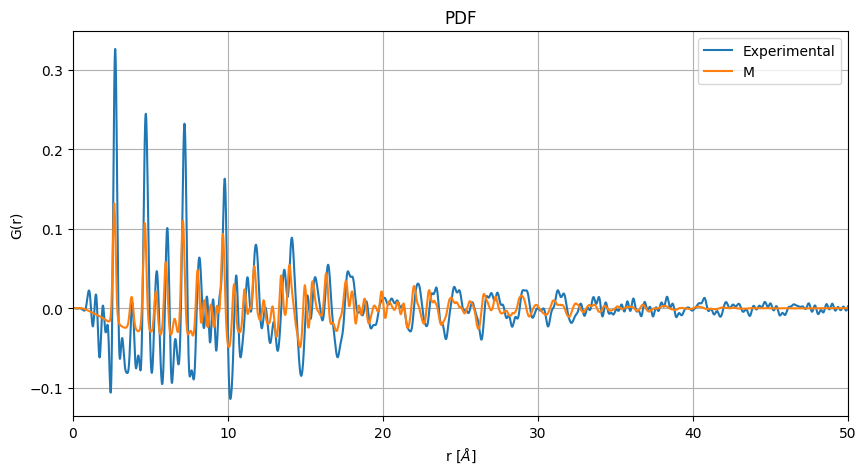

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df_M= pd.read_csv(f'{name[:-4]}_d2.txt', sep='\s+')
df_exp = pd.read_csv('../Post-PtPdCo-PDF.csv', sep = '\s+', header=None, names=['r','G(r)'])

df_exp = df_exp.replace('--',np.nan).dropna()
df_exp = df_exp.astype(float)


#print(df_exp.to_string())

fig, ax =plt.subplots(figsize=(10,5))
ax.plot(df_exp['r'],df_exp['G(r)'], label = 'Experimental')
ax.plot(df_M['#r(A)'], df_M['G(r)'], label='M')



ax.set_xlabel('r [$\\AA$]')
ax.set_xlim([0,50])
ax.set_ylabel('G(r)')
ax.set_title('PDF')
ax.grid('True', linestyle='-')
ax.legend()
